In [111]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [112]:
# Read in ice extent data 
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\sea_ice\seaice.csv')

In [113]:
df.head(n=5)

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [139]:
# Convert date values to strings to combine
df['Year'] = df['Year'].apply(lambda x: str(x))
df['Month'] = df['Month'].apply(lambda x: str(x))
df['Day'] = df['Day'].apply(lambda x: str(x))
# Add values together and convert to datetime format
df['Date'] = df['Year'] + '-' + df['Month'] + '-' + df['Day']
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df.dtypes

indexed = df.set_index(['Date'])

In [147]:
new = indexed[['Extent','hemisphere']]
new

rolmn = new['Extent'].rolling(window=12).mean()
rolsd = new['Extent'].rolling(window=12).std()
rolmn

Date
1978-10-26          NaN
1978-10-28          NaN
1978-10-30          NaN
1978-11-01          NaN
1978-11-03          NaN
1978-11-05          NaN
1978-11-07          NaN
1978-11-09          NaN
1978-11-11          NaN
1978-11-13          NaN
1978-11-15          NaN
1978-11-17    10.991750
1978-11-19    11.128333
1978-11-21    11.264417
1978-11-23    11.407500
1978-11-25    11.555083
1978-11-27    11.712167
1978-11-29    11.855167
1978-12-01    11.992250
1978-12-03    12.114833
1978-12-05    12.237417
1978-12-07    12.370000
1978-12-09    12.503667
1978-12-11    12.648750
1978-12-13    12.793167
1978-12-15    12.926167
1978-12-17    13.053917
1978-12-19    13.174833
1978-12-21    13.286000
1978-12-23    13.411417
                ...    
2017-05-09     7.538250
2017-05-10     7.653583
2017-05-11     7.772833
2017-05-12     7.896250
2017-05-13     8.025667
2017-05-14     8.155250
2017-05-15     8.284000
2017-05-16     8.413917
2017-05-17     8.546667
2017-05-18     8.680417
2017-05-19 

In [116]:
# Collect only needed columns to make data easier to work with
data = df[['Date','Extent','Missing','hemisphere']]
# Seperate into data for North and South poles
north = data[data['hemisphere']== 'north']
south = data[data['hemisphere']== 'south']

Text(0.5, 1.0, 'South Pole Ice Extent')

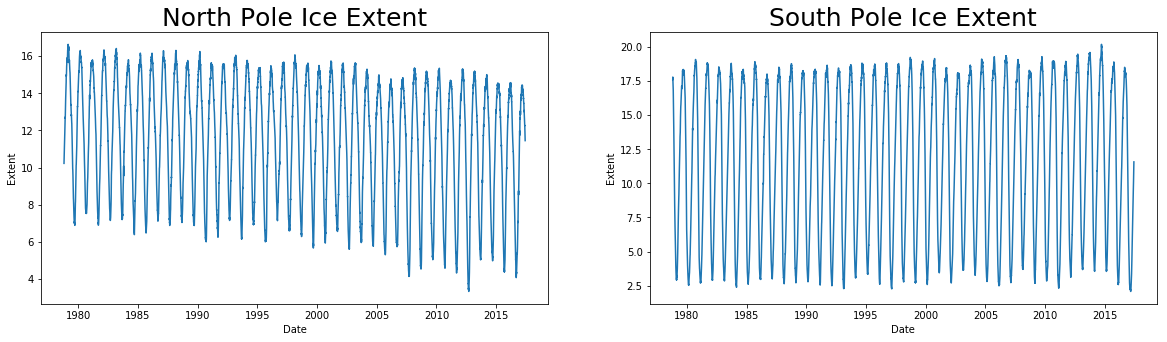

In [117]:
# Plot raw data for north and south poles
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.lineplot(x='Date',y='Extent',data=north)
plt.title('North Pole Ice Extent',size=25)
plt.subplot(122)
sns.lineplot(x='Date',y='Extent',data=south)
plt.title('South Pole Ice Extent',size=25)

In [118]:
# Shift data to see if and trends emerge
data['diff_1'] = data.Extent - data.Extent.shift()
# Seperate into data for North and South poles
north = data[data['hemisphere']== 'north']
south = data[data['hemisphere']== 'south']

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'South Pole Ice Extent')

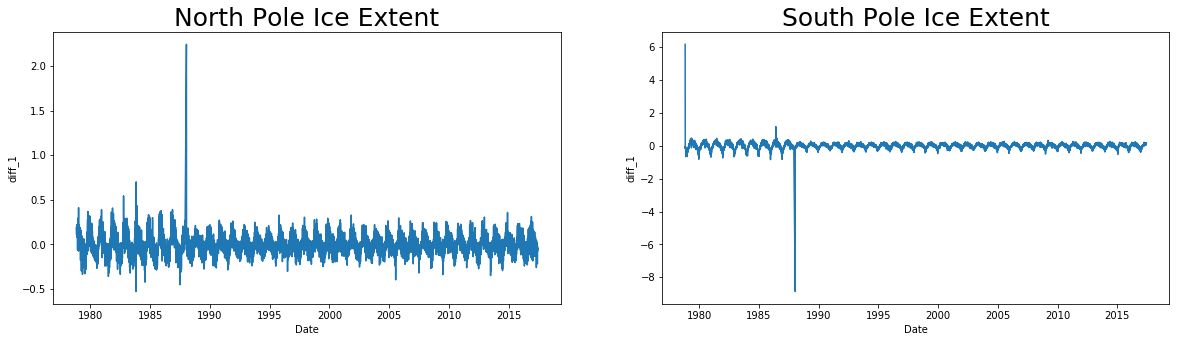

In [119]:
# Plot raw data for north and south poles
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.lineplot(x='Date',y='diff_1',data=north)
plt.title('North Pole Ice Extent',size=25)
plt.subplot(122)
sns.lineplot(x='Date',y='diff_1',data=south)
plt.title('South Pole Ice Extent',size=25)

In [120]:
# Subset data into 1987-1989 to see peak better
df_sub = data[data['Date'] > '1987-1-1']
df_sub = df_87[data['Date'] < '1989-1-1']
# Seperate into data for North and South poles
north = df_sub[df_sub['hemisphere']== 'north']
south = df_sub[df_sub['hemisphere']== 'south']               

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'South Pole Ice Extent')

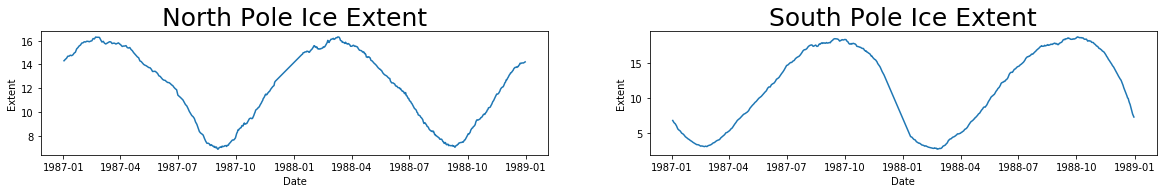

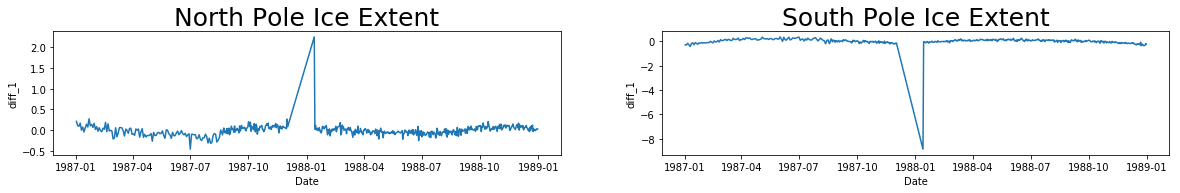

In [121]:
# Plot raw data for north and south poles
plt.figure(figsize=(20,5))
plt.subplot(221)
sns.lineplot(x='Date',y='Extent',data=north)
plt.title('North Pole Ice Extent',size=25)
plt.subplot(222)
sns.lineplot(x='Date',y='Extent',data=south)
plt.title('South Pole Ice Extent',size=25)
# Plot Shifted data to better show peak
plt.figure(figsize=(20,5))
plt.subplot(223)
sns.lineplot(x='Date',y='diff_1',data=north)
plt.title('North Pole Ice Extent',size=25)
plt.subplot(224)
sns.lineplot(x='Date',y='diff_1',data=south)
plt.title('South Pole Ice Extent',size=25)

 # Peak produced due to fact that 1988 was hottest year on record most likely
    https://www.latimes.com/archives/la-xpm-1989-02-04-mn-1524-story.html

In [122]:
# For purposes of forecasting future ice extent lets start with 1990 to avoid this peak

In [123]:
data = data[data['Date'] > '1990-1-1']
# Seperate into data for North and South poles
north = data[data['hemisphere']== 'north']
south = data[data['hemisphere']== 'south']

Text(0.5, 1.0, 'South Pole Ice Extent')

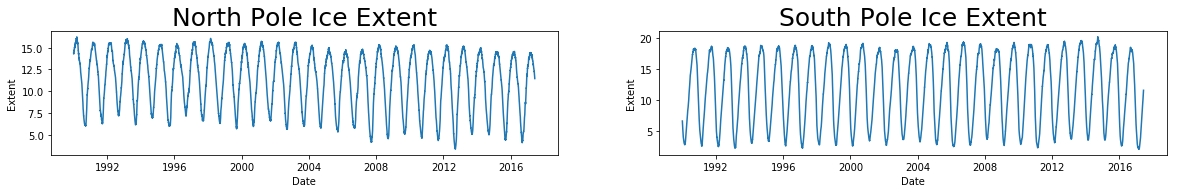

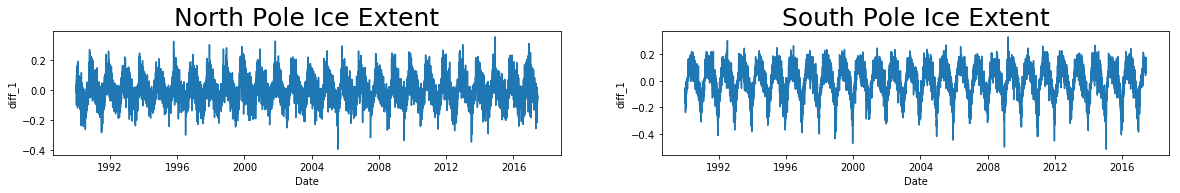

In [124]:
# Plot raw data for north and south poles
plt.figure(figsize=(20,5))
plt.subplot(221)
sns.lineplot(x='Date',y='Extent',data=north)
plt.title('North Pole Ice Extent',size=25)
plt.subplot(222)
sns.lineplot(x='Date',y='Extent',data=south)
plt.title('South Pole Ice Extent',size=25)
# Plot Shifted data to better show peak
plt.figure(figsize=(20,5))
plt.subplot(223)
sns.lineplot(x='Date',y='diff_1',data=north)
plt.title('North Pole Ice Extent',size=25)
plt.subplot(224)
sns.lineplot(x='Date',y='diff_1',data=south)
plt.title('South Pole Ice Extent',size=25)

In [125]:

# Calculate rolling mean and sd and plot
#rol_mean_n = north.rolling(window=12).mean() # 12 due to 12 months
#rol_std_n = north.rolling(window=12).std() 
north.dtypes

Date          datetime64[ns]
Extent               float64
Missing              float64
hemisphere            object
diff_1               float64
dtype: object

In [35]:
# The trend looks a lot cleaner with data before 1990 removed - also will most likely produce best results for forecasting purposes

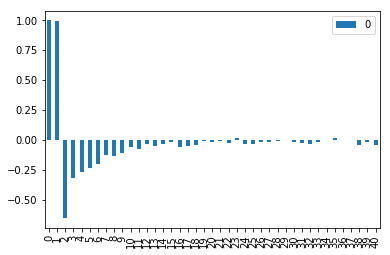

In [103]:
from statsmodels.tsa.stattools import pacf
x_acf_n = pd.DataFrame(pacf(north.Extent))
x_acf_n.plot(kind='bar')

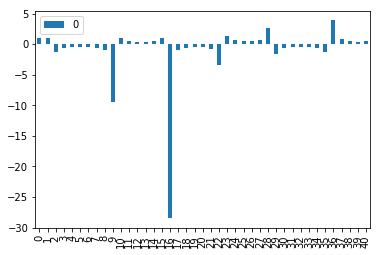

In [104]:
x_acf_s = pd.DataFrame(pacf(south.Extent))
x_acf_s.plot(kind='bar')

In [36]:
# Lets see how each part of arima model affects forecaseing ability

In [37]:
from statsmodels.tsa.arima_model import ARIMA

# Autoregressive Model Building

In [85]:
# Initialize model
model_n = ARIMA(north.Extent, order=(1,0,0))
model_s = ARIMA(south.Extent, order=(1,0,0))
# Fit model to data
n_fit = model_n.fit()
s_fit = model_s.fit()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


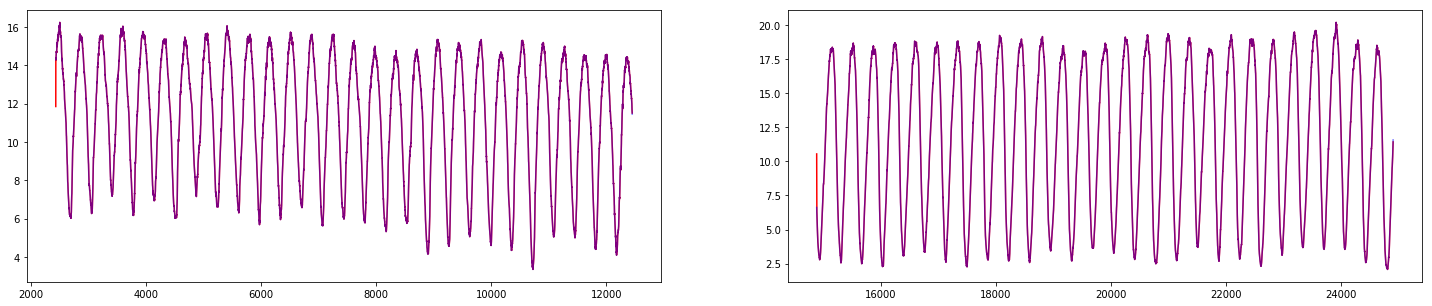

In [53]:
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(n_fit.fittedvalues,color='red')
plt.plot(north.Extent,color='blue',alpha=0.5)
plt.subplot(122)
plt.plot(s_fit.fittedvalues,color='red')
plt.plot(south.Extent,color='blue',alpha=0.5)

# Testing I part of ARIMA model

In [55]:
# Initialize model
model_n = ARIMA(north.Extent, order=(0,1,0))
model_s = ARIMA(south.Extent, order=(0,1,0))
# Fit model to data
n_fit = model_n.fit()
s_fit = model_s.fit()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forec

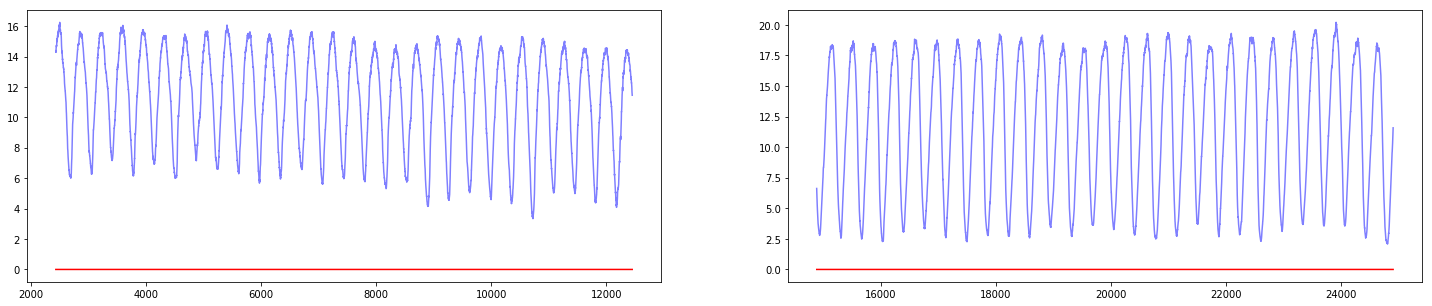

In [56]:
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(n_fit.fittedvalues,color='red')
plt.plot(north.Extent,color='blue',alpha=0.5)
plt.subplot(122)
plt.plot(s_fit.fittedvalues,color='red')
plt.plot(south.Extent,color='blue',alpha=0.5)

# Using Moving Average part of ARIMA model

In [57]:
# Initialize model
model_n = ARIMA(north.Extent, order=(0,0,1))
model_s = ARIMA(south.Extent, order=(0,0,1))
# Fit model to data
n_fit = model_n.fit()
s_fit = model_s.fit()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


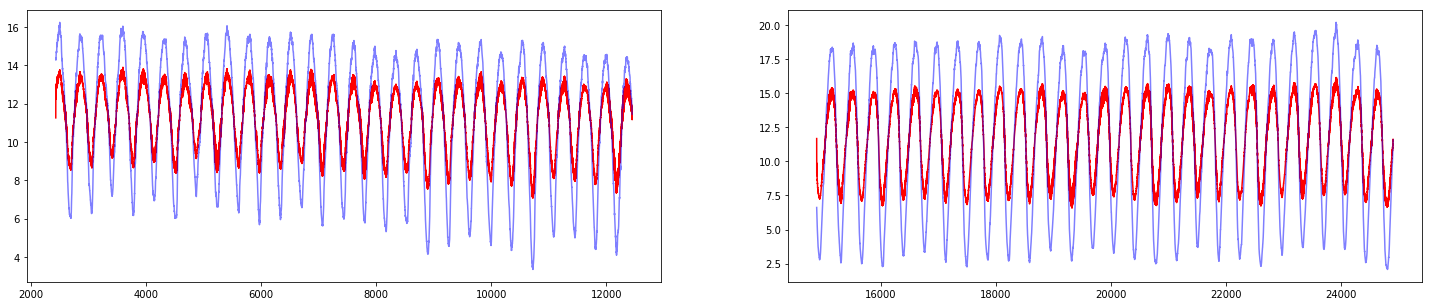

In [58]:
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(n_fit.fittedvalues,color='red')
plt.plot(north.Extent,color='blue',alpha=0.5)
plt.subplot(122)
plt.plot(s_fit.fittedvalues,color='red')
plt.plot(south.Extent,color='blue',alpha=0.5)

# Moving Average and Autoregressive parts seem to be only important parts

In [89]:
# Initialize model
model_n = ARIMA(north.Extent, order=(1,0,1))
model_s = ARIMA(south.Extent, order=(1,0,1))
# Fit model to data
n_fit = model_n.fit()
s_fit = model_s.fit()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


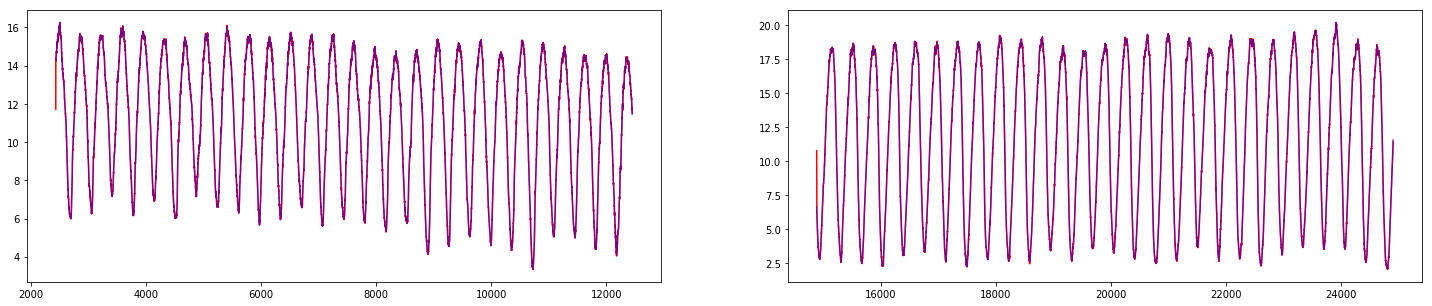

In [90]:
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(n_fit.fittedvalues,color='red')
plt.plot(north.Extent,color='blue',alpha=0.5)
plt.subplot(122)
plt.plot(s_fit.fittedvalues,color='red')
plt.plot(south.Extent,color='blue',alpha=0.5)

In [ ]:
# Break off years after 2000 and see compare forecast to actual data for each

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


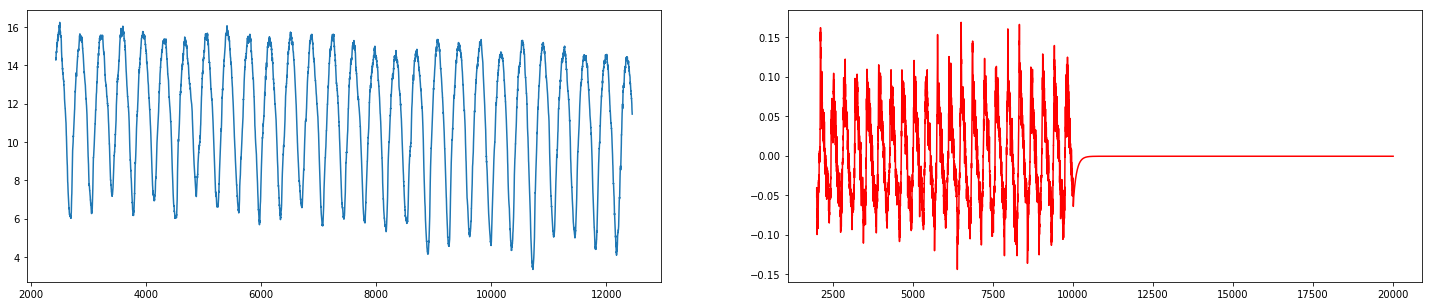

In [88]:
x_n = n_fit.predict(start=(2000),end=(20000))
x_s = s_fit.predict(start=(1200),end=(1400),dynamic=False)
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(north['Extent'])
plt.subplot(122)
plt.plot(x_n,color='r')


In [ ]:
# Forecast ice extent for many years to come

In [ ]:
# take max and min from each year and build linear model from that

In [43]:
print('''
For the North Pole Ice Data
''')
print(n_fit.summary())

print('''
For the South Pole Ice Data
''')
print(s_fit.summary())


For the North Pole Ice Data

                              ARMA Model Results                              
Dep. Variable:                 Extent   No. Observations:                10019
Model:                     ARMA(1, 0)   Log Likelihood               10787.469
Method:                       css-mle   S.D. of innovations              0.082
Date:                Fri, 05 Apr 2019   AIC                         -21568.939
Time:                        12:32:34   BIC                         -21547.302
Sample:                             0   HQIC                        -21561.616
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.8517      1.848      6.414      0.000       8.230      15.473
ar.L1.Extent     0.9996      0.000   4460.945      0.000       0.999       1.000
              

(array([8.000e+00, 1.800e+02, 2.815e+03, 5.075e+03, 1.781e+03, 1.530e+02,
        6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([-0.39823756, -0.28101584, -0.16379413, -0.04657242,  0.07064929,
         0.187871  ,  0.30509271,  0.42231442,  0.53953614,  0.65675785,
         0.77397956,  0.89120127,  1.00842298,  1.12564469,  1.2428664 ,
         1.36008812,  1.47730983,  1.59453154,  1.71175325,  1.82897496,
         1.94619667,  2.06341838,  2.1806401 ,  2.29786181,  2.41508352,
         2.53230523]),
 <a list of 25 Patch objects>)

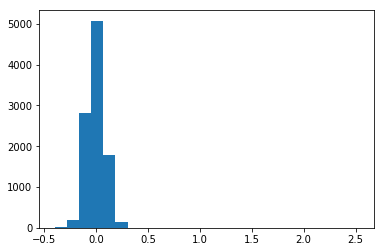

In [47]:
# Plot residuals - seem to be normally distributed
plt.hist(n_fit.resid,bins=25)